In [111]:
from gensim.utils import simple_preprocess

def preprocess_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    # Tokenize and preprocess (lowercase, remove punctuation)
    tokens = simple_preprocess(text)
    return tokens

scripts = ['HolyBible.txt', 'NobelQuran.txt', 'TheGita.txt']

from gensim.models import Word2Vec
from gensim.models import FastText
import gensim

def train_word2vec(tokens):
    model = Word2Vec(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=100, epochs=500)
    return model

def train_fasttext(tokens):
    model = FastText(sentences=[tokens], vector_size=100, window=5, min_count=1, workers=100, epochs=500)
    return model



word2vec = []
fasttext = []
for script in scripts:
    token = preprocess_text(script)
    print(script," has ",len(token)," words")
    word2vec_model = train_word2vec(token)
    word2vec_model.save(str(script).split('.')[0]+'_word2vec.model')
    word2vec.append(str(script).split('.')[0]+'_word2vec.model')
    fasttext_model = train_fasttext(token)
    fasttext_model.save(str(script).split('.')[0]+'_fasttext.model')
    fasttext.append(str(script).split('.')[0]+'_fasttext.model')



HolyBible.txt  has  774784  words
NobelQuran.txt  has  153467  words
TheGita.txt  has  21322  words


In [110]:
'HolyBible.txt'.split('.')[0]

'HolyBible'

In [80]:
import gensim

In [102]:
for w2v in word2vec:
    model = gensim.models.Word2Vec.load(w2v)
    print(model.wv.most_similar('heaven'))
    

[('firmament', 0.44439905881881714), ('brimstone', 0.3737461268901825), ('fifth', 0.3646889925003052), ('light', 0.35907360911369324), ('open', 0.34514951705932617), ('dried', 0.34062451124191284), ('destroyed', 0.33938711881637573), ('darkness', 0.32107993960380554), ('breed', 0.31916266679763794), ('hills', 0.3096456527709961)]
[('fashioned', 0.6228267550468445), ('face', 0.48280787467956543), ('provision', 0.43311235308647156), ('doing', 0.42659568786621094), ('habitation', 0.41040536761283875), ('generations', 0.4036746919155121), ('rock', 0.3984643518924713), ('succeeding', 0.3913157880306244), ('whereon', 0.3888821601867676), ('protection', 0.3856371343135834)]
[('lead', 0.6688374876976013), ('pray', 0.484158456325531), ('touching', 0.4717356860637665), ('gate', 0.4613317847251892), ('hues', 0.43437913060188293), ('space', 0.43230023980140686), ('open', 0.4247188866138458), ('sky', 0.39322978258132935), ('risen', 0.3907393217086792), ('victorious', 0.39005327224731445)]


In [101]:
for w2v in fasttext:
    model = gensim.models.Word2Vec.load(w2v)
    print(model.wv.most_similar('heaven'))

[('heavenly', 0.9366846084594727), ('heavens', 0.8637098670005798), ('leaven', 0.847231924533844), ('heavy', 0.8361193537712097), ('heave', 0.8196538090705872), ('aven', 0.8180095553398132), ('heavily', 0.79710853099823), ('graven', 0.7588719725608826), ('heaved', 0.7451559901237488), ('engraven', 0.7369558215141296)]
[('heavenly', 0.9064635038375854), ('heavens', 0.8811612129211426), ('heave', 0.8271104097366333), ('raven', 0.7921992540359497), ('heavily', 0.7038346529006958), ('heap', 0.6113048791885376), ('heavy', 0.5516154766082764), ('hearken', 0.531720757484436), ('hew', 0.5293681621551514), ('shaven', 0.5240047574043274)]
[('heavens', 0.8740382790565491), ('heavenly', 0.8718811869621277), ('seven', 0.5616048574447632), ('open', 0.5344452261924744), ('even', 0.5015878677368164), ('keen', 0.4874572157859802), ('ten', 0.4759194552898407), ('rotten', 0.44076183438301086), ('leave', 0.43208637833595276), ('cleave', 0.4303781986236572)]


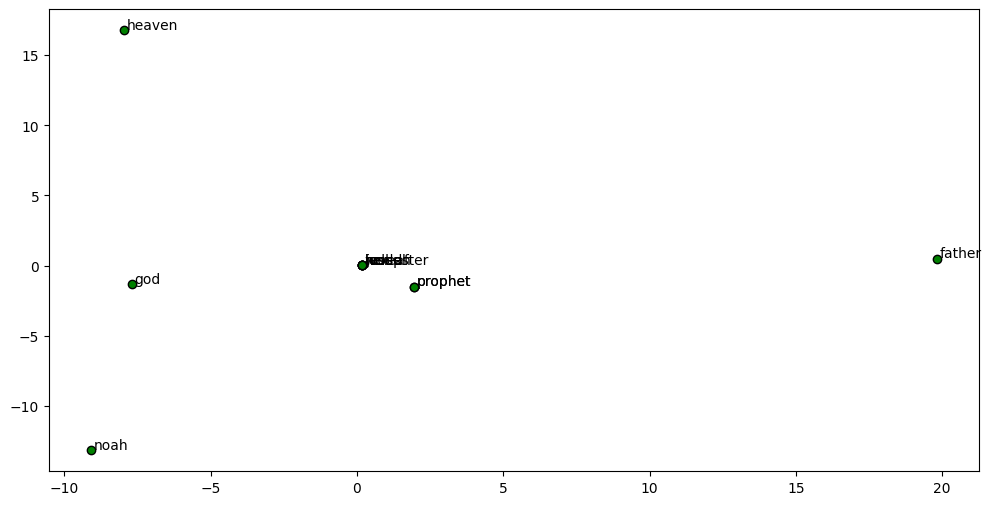

In [168]:
# visualize embeddings
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

words = ['heaven', 'hell', 'world', 'hereafter','god', 'prophet', 'jesus', 'father', 'prophet', 'moses', 'joseph', 'noah']
model = gensim.models.Word2Vec.load('HolyBible_word2vec.model')
wvs = model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+.1, y+.1), xytext=(0, 0), textcoords='offset points')

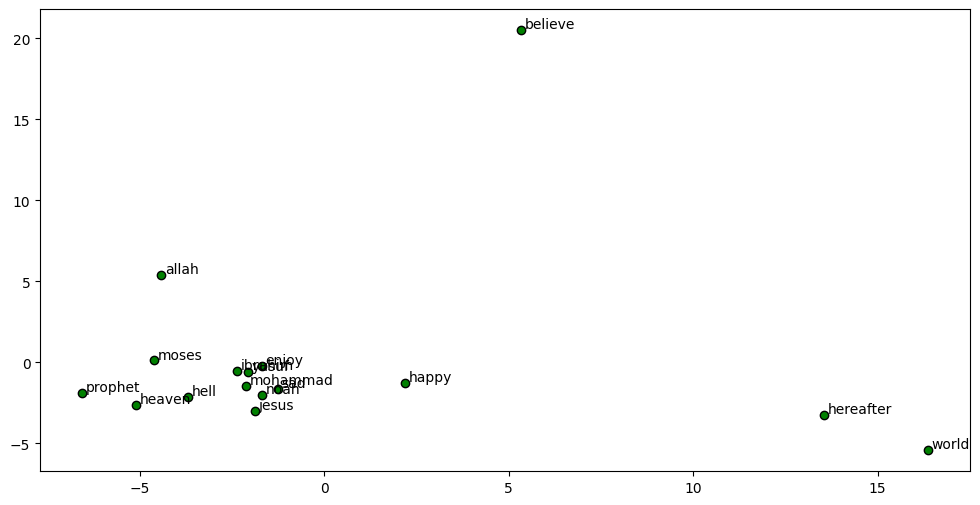

In [150]:
# visualize embeddings
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

words = ['heaven', 'hell', 'world', 'hereafter','allah', 'prophet', 'believe', 'happy', 'sad','enjoy', 'mohammad','jesus','yusuf','ibrahim','moses','noah']
model = gensim.models.Word2Vec.load('NobelQuran_word2vec.model')
wvs = model.wv[words]

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='green', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+.1, y+.1), xytext=(0, 0), textcoords='offset points')

In [103]:
word2vec

['HolyBible.txt word2vec.wem',
 'NobelQuran.txt word2vec.wem',
 'TheGita.txt word2vec.wem']

In [175]:
!python -m spacy download en
!python -m spacy download en_core_web_sm

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [182]:
# Load GloVe embeddings into a dictionary
def load_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

glove_embeddings_path = 'glove.6B.300d.txt'  # Adjust the path to your downloaded GloVe file
glove_embeddings = load_embeddings(glove_embeddings_path)

In [183]:
import numpy as np

# Accessing word embeddings
word = 'example'
if word in glove_embeddings:
    embedding = glove_embeddings[word]
    print(f"Embedding for '{word}': {embedding}")
else:
    print(f"'{word}' not found in embeddings")

# Finding similarity between word embeddings
from scipy.spatial.distance import cosine

word1 = 'king'
word2 = 'queen'
similarity = 1 - cosine(glove_embeddings[word1], glove_embeddings[word2])
print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Embedding for 'example': [-0.20297    0.010222   0.063166  -0.23259    0.063991   0.13313
 -0.12547   -0.12964   -0.2553    -1.7295     0.091936   0.021622
 -0.31398    0.011587   0.2258    -0.15155   -0.081282  -0.22776
  0.0030483 -0.2752     0.010934   0.05136    0.22624    0.43196
  0.012415  -0.25724   -0.093916  -0.10665   -0.071235  -0.10342
 -0.098095   0.48373   -0.67475   -0.10943   -0.50882   -0.05844
  0.15398   -0.17816   -0.39477    0.066937   0.041519  -0.085288
 -0.21029    0.2462    -0.37551   -0.22549   -0.082648   0.37232
 -0.14809    0.0786     0.11278   -0.10294    0.37601    0.15898
 -0.17571   -0.063246  -0.08103   -0.10676    0.094943   0.28391
  0.35478    0.10635    0.51442   -0.10787   -0.14091   -0.087904
 -0.15251    0.1862     0.14508    0.28751   -0.36265   -0.054447
  0.083526   0.015638  -0.38204   -0.10227   -0.022685   0.24539
 -0.14744   -0.13984   -0.29816   -0.079155  -0.042634  -0.20823
  0.32099    0.11908   -0.10361    0.36009   -0.097773  -0.09

In [185]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Replace 'path_to_glove_file/glove.6B.100d.txt' with your GloVe file path
glove_file = 'glove.6B.300d.txt'

# Convert GloVe format to Word2Vec format
word2vec_temp_file = get_tmpfile("glove_word2vec.txt")
glove2word2vec(glove_file, word2vec_temp_file)

# Load GloVe embeddings using Gensim
glove_model = KeyedVectors.load_word2vec_format(word2vec_temp_file)

/var/folders/j8/wb7_9rh96f9g2r0vvmqchbd80000gn/T/ipykernel_41294/2545940838.py:10: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_temp_file)


In [186]:
# Example usage
word = 'example'
if word in glove_model:
    embedding = glove_model[word]
    print(f"Embedding for '{word}': {embedding}")
else:
    print(f"'{word}' not found in embeddings")

word1 = 'king'
word2 = 'queen'
similarity = glove_model.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Embedding for 'example': [-0.20297    0.010222   0.063166  -0.23259    0.063991   0.13313
 -0.12547   -0.12964   -0.2553    -1.7295     0.091936   0.021622
 -0.31398    0.011587   0.2258    -0.15155   -0.081282  -0.22776
  0.0030483 -0.2752     0.010934   0.05136    0.22624    0.43196
  0.012415  -0.25724   -0.093916  -0.10665   -0.071235  -0.10342
 -0.098095   0.48373   -0.67475   -0.10943   -0.50882   -0.05844
  0.15398   -0.17816   -0.39477    0.066937   0.041519  -0.085288
 -0.21029    0.2462    -0.37551   -0.22549   -0.082648   0.37232
 -0.14809    0.0786     0.11278   -0.10294    0.37601    0.15898
 -0.17571   -0.063246  -0.08103   -0.10676    0.094943   0.28391
  0.35478    0.10635    0.51442   -0.10787   -0.14091   -0.087904
 -0.15251    0.1862     0.14508    0.28751   -0.36265   -0.054447
  0.083526   0.015638  -0.38204   -0.10227   -0.022685   0.24539
 -0.14744   -0.13984   -0.29816   -0.079155  -0.042634  -0.20823
  0.32099    0.11908   -0.10361    0.36009   -0.097773  -0.09